# Getting to Grips with JSTOR data

There is a lot of data in the zip files provided by JSTOR. How to get at it properly?

In [1]:
import os
import re
import time
import pickle as p
from math import inf

from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
from nltk.tokenize import wordpunct_tokenize

from utils import JSTORCorpus

## Input pipeline

Use the JSTORCorpus class to stream in data from the DfR corpus

In [2]:
corpus = JSTORCorpus.load('data/last-15-years-corpus.p')

Corpus loaded from data/last-15-years-corpus.p


## Test input pipeline with Gensim

Gensim provides several methods for modelling a corpus as a whole. Let's try FastText and word2vec.

### How Romantic is this corpus?

The corpus was constructed by searching for the 'Romanticism' keyword. But it seems there are lots of articles here that aren't actually about Romanticism...

In [3]:
import nltk

In [4]:
freqs = []
for vec in tqdm(corpus):
    count = len([word for word in vec if word.lower().startswith('romantic')])
    total = len(vec)
    freqs.append(count/total*1000)

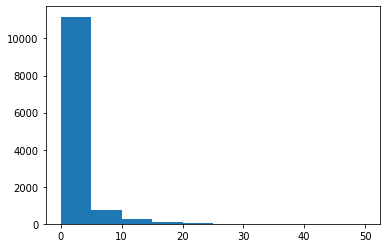

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(freqs)
plt.show()

### Find collocations for 'self' in this corpus.

In [ ]:
from itertools import chain

import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

# statistical measure for bigrams
bigram_measures = BigramAssocMeasures()

# Drop ngrams without 'self' as a member
self_filter = lambda *w: 'self' not in w

# Get top 10 collocates for all the docs in the corpus
corpus_chain = chain(*corpus.iter_lower())
finder = BigramCollocationFinder.from_words(corpus_chain, window_size=4)
finder.apply_ngram_filter(self_filter)

In [16]:
finder.nbest(n=200, score_fn=bigram_measures.likelihood_ratio)

[('self', '-'),
 ('of', 'self'),
 ('self', 'conscious'),
 ('the', 'self'),
 ('self', 'consciousness'),
 ('self', 'consciously'),
 ('.', 'self'),
 ('self', 'reflexive'),
 ('self', 'fashioning'),
 ('self', 'reliance'),
 ('a', 'self'),
 ('self', 'reflexivity'),
 ('self', 'referential'),
 ('self', 'sufficiency'),
 ('self', 'interest'),
 ('self', 'sacrifice'),
 ('self', 'evident'),
 ('self', 'the'),
 ('self', 'contained'),
 ('self', 'portrait'),
 ('self', 'determination'),
 (',', 'self'),
 ('s', 'self'),
 ('self', 'awareness'),
 ('self', '‐'),
 ('self', 'representation'),
 ('and', 'self'),
 ('self', 'of'),
 ('self', 'reflection'),
 ('self', 'serving'),
 ('self', 'expression'),
 ('self', 'and'),
 ('sense', 'self'),
 ('self', 'definition'),
 ('self', 'indulgent'),
 ('self', 'sufficient'),
 ('self', 'knowledge'),
 ('self', 'presentation'),
 ('his', 'self'),
 ('own', 'self'),
 ('self', 's'),
 ('self', 'possession'),
 ('self', 'destructive'),
 ('self', 'preservation'),
 ('self', 'deception'),
 (

In [12]:
top_20

[('self', '-'),
 ('of', 'self'),
 ('self', 'conscious'),
 ('the', 'self'),
 ('self', 'consciousness'),
 ('self', 'consciously'),
 ('.', 'self'),
 ('self', 'reflexive'),
 ('self', 'fashioning'),
 ('self', 'reliance'),
 ('a', 'self'),
 ('self', 'reflexivity'),
 ('self', 'referential'),
 ('self', 'sufficiency'),
 ('self', 'interest'),
 ('self', 'sacrifice'),
 ('self', 'evident'),
 ('self', 'the'),
 ('self', 'contained'),
 ('self', 'portrait')]

Why don't we look for trigram collocations, and compare 'self' in the context of 'romantic' to 'self' in other contexts?

In [ ]:
tri_finder = 